Celda 1: Importaciones

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import os 

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("001_2017_eda.log"),  
        logging.StreamHandler()
    ]
)

logging.info("Inicio del notebook de EDA (001_2017_eda.ipynb).")

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

2025-05-18 21:08:43,694 - INFO - Inicio del notebook de EDA (001_2017_eda.ipynb).


Celda 2: Definición de la ruta del archivo


In [14]:
# --- Definición de la ruta al archivo ---
file_path = "/home/nicolas/Escritorio/workshops ETL/workshop_3/data/raw/2017.csv"

logging.info(f"Ruta del archivo a cargar: {file_path}")

df_2017 = None

try:
    logging.info(f"Intentando cargar el archivo CSV: {os.path.basename(file_path)}")
    df_2017 = pd.read_csv(file_path)
    logging.info(f"Archivo {os.path.basename(file_path)} cargado exitosamente.")
    logging.info(f"El DataFrame tiene {df_2017.shape[0]} filas y {df_2017.shape[1]} columnas.")

except FileNotFoundError:
    logging.error(f"Error: El archivo no fue encontrado en la ruta especificada: {file_path}")
except pd.errors.EmptyDataError:
    logging.error(f"Error: El archivo {os.path.basename(file_path)} está vacío.")
except pd.errors.ParserError:
    logging.error(f"Error: No se pudo parsear el archivo {os.path.basename(file_path)}. Verifica el formato del CSV.")
except Exception as e:
    logging.error(f"Ocurrió un error inesperado al cargar {os.path.basename(file_path)}: {e}")

2025-05-18 21:08:43,705 - INFO - Ruta del archivo a cargar: /home/nicolas/Escritorio/workshops ETL/workshop_3/data/raw/2017.csv
2025-05-18 21:08:43,706 - INFO - Intentando cargar el archivo CSV: 2017.csv
2025-05-18 21:08:43,708 - INFO - Archivo 2017.csv cargado exitosamente.
2025-05-18 21:08:43,709 - INFO - El DataFrame tiene 155 filas y 12 columnas.


Celda 3: Carga de datos con manejo de errores


In [15]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2017' in locals() and df_2017 is not None:
    logging.info("Mostrando las primeras 5 filas del DataFrame en formato Markdown.")
    print(df_2017.head().to_markdown(index=False))
else:
    logging.error("El DataFrame df_2017 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 21:08:43,715 - INFO - Mostrando las primeras 5 filas del DataFrame en formato Markdown.


| Country     |   Happiness.Rank |   Happiness.Score |   Whisker.high |   Whisker.low |   Economy..GDP.per.Capita. |   Family |   Health..Life.Expectancy. |   Freedom |   Generosity |   Trust..Government.Corruption. |   Dystopia.Residual |
|:------------|-----------------:|------------------:|---------------:|--------------:|---------------------------:|---------:|---------------------------:|----------:|-------------:|--------------------------------:|--------------------:|
| Norway      |                1 |             7.537 |        7.59444 |       7.47956 |                    1.61646 |  1.53352 |                   0.796667 |  0.635423 |     0.362012 |                        0.315964 |             2.27703 |
| Denmark     |                2 |             7.522 |        7.58173 |       7.46227 |                    1.48238 |  1.55112 |                   0.792566 |  0.626007 |     0.35528  |                        0.40077  |             2.31371 |
| Iceland     |                3 |      

Celda 4: Mostrar primeras 5 filas del DataFrame


In [16]:
# --- Obtener y mostrar la lista de columnas ---
if 'df_2017' in locals() and df_2017 is not None:
    logging.info("Obteniendo la lista de todas las columnas del DataFrame df_2017.")
    column_list = df_2017.columns.tolist()

    print("\nLista de columnas (df_2017):")
    for i, col in enumerate(column_list):
        print(f"{i+1}. {col}")
    logging.info(f"El DataFrame df_2017 tiene {len(column_list)} columnas.")
    logging.info(f"Nombres de las columnas (df_2017): {column_list}")
else:
    logging.error("El DataFrame df_2017 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 21:08:43,725 - INFO - Obteniendo la lista de todas las columnas del DataFrame df_2017.
2025-05-18 21:08:43,725 - INFO - El DataFrame df_2017 tiene 12 columnas.
2025-05-18 21:08:43,726 - INFO - Nombres de las columnas (df_2017): ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']



Lista de columnas (df_2017):
1. Country
2. Happiness.Rank
3. Happiness.Score
4. Whisker.high
5. Whisker.low
6. Economy..GDP.per.Capita.
7. Family
8. Health..Life.Expectancy.
9. Freedom
10. Generosity
11. Trust..Government.Corruption.
12. Dystopia.Residual


In [17]:
# --- Mostrar la lista de todos los países presentes en df_2017 ---
if 'df_2017' in locals() and df_2017 is not None:
    logging.info("Obteniendo la lista de todos los países en df_2017.")
    countries = df_2017['Country'].unique().tolist()
    print(f"Total de países: {len(countries)}")
    print(countries)
else:
    logging.error("El DataFrame df_2017 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 21:08:43,733 - INFO - Obteniendo la lista de todos los países en df_2017.


Total de países: 155
['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland', 'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia', 'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland', 'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile', 'United Arab Emirates', 'Brazil', 'Czech Republic', 'Argentina', 'Mexico', 'Singapore', 'Malta', 'Uruguay', 'Guatemala', 'Panama', 'France', 'Thailand', 'Taiwan Province of China', 'Spain', 'Qatar', 'Colombia', 'Saudi Arabia', 'Trinidad and Tobago', 'Kuwait', 'Slovakia', 'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador', 'El Salvador', 'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Belize', 'Japan', 'Lithuania', 'Algeria', 'Latvia', 'South Korea', 'Moldova', 'Romania', 'Bolivia', 'Turkmenistan', 'Kazakhstan', 'North Cyprus', 'Slovenia', 'Peru', 'Mauritius', 'Cyprus', 'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay', 'Hong Kong S.A.R., China', 'Philippines', 'Serbia', 'Jordan', 'Hungary', 'Jamaica', 'Croatia', 'Kosovo', 'China

Celda 5: Información General del DataFrame


In [18]:
# --- Verificar si el DataFrame df_2017 tiene filas duplicadas ---
if 'df_2017' in locals() and df_2017 is not None:
    logging.info("Verificando la existencia de filas duplicadas en df_2017.")
    num_duplicated_rows = df_2017.duplicated().sum()

    if num_duplicated_rows > 0:
        logging.info(f"Se encontraron {num_duplicated_rows} fila(s) duplicada(s) en df_2017.")
        print(f"\nEl DataFrame df_2017 contiene {num_duplicated_rows} fila(s) duplicada(s).")
    else:
        logging.info("No se encontraron filas duplicadas en el DataFrame df_2017.")
        print("\nNo hay filas duplicadas en el DataFrame df_2017.")
else:
    logging.error("El DataFrame df_2017 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 21:08:43,740 - INFO - Verificando la existencia de filas duplicadas en df_2017.
2025-05-18 21:08:43,742 - INFO - No se encontraron filas duplicadas en el DataFrame df_2017.



No hay filas duplicadas en el DataFrame df_2017.


In [19]:
# --- Mostrar información general del DataFrame df_2017 (.info()) ---
if 'df_2017' in locals() and df_2017 is not None:
    logging.info("Mostrando información del DataFrame df_2017 (conteo de no nulos y tipos de datos).")
    print("\nInformación del DataFrame (df_2017):")
    df_2017.info()

    print("\nConteo de valores nulos por columna (df_2017):")
    null_counts = df_2017.isnull().sum()
    print(null_counts[null_counts > 0].to_markdown() if null_counts.sum() > 0 else "No hay valores nulos explícitos (NaN).")
    if null_counts.sum() > 0:
        logging.info(f"Columnas con valores nulos y sus conteos (df_2017): {null_counts[null_counts > 0].to_dict()}")
    else:
        logging.info("No se encontraron valores nulos explícitos (NaN) en el DataFrame df_2017.")
else:
    logging.error("El DataFrame df_2017 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 21:08:43,749 - INFO - Mostrando información del DataFrame df_2017 (conteo de no nulos y tipos de datos).
2025-05-18 21:08:43,753 - INFO - No se encontraron valores nulos explícitos (NaN) en el DataFrame df_2017.



Información del DataFrame (df_2017):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(1

In [20]:
# --- Calcular y mostrar estadísticas descriptivas para columnas numéricas de df_2017 ---
if 'df_2017' in locals() and df_2017 is not None:
    logging.info("Calculando estadísticas descriptivas para las columnas numéricas de df_2017.")
    descriptive_stats_numeric = df_2017.describe()
    print("\nEstadísticas Descriptivas de las Columnas Numéricas (df_2017):")
    print(descriptive_stats_numeric.to_markdown())
    logging.info("Estadísticas descriptivas numéricas de df_2017 calculadas y mostradas.")
else:
    logging.error("El DataFrame df_2017 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 21:08:43,759 - INFO - Calculando estadísticas descriptivas para las columnas numéricas de df_2017.
2025-05-18 21:08:43,771 - INFO - Estadísticas descriptivas numéricas de df_2017 calculadas y mostradas.



Estadísticas Descriptivas de las Columnas Numéricas (df_2017):
|       |   Happiness.Rank |   Happiness.Score |   Whisker.high |   Whisker.low |   Economy..GDP.per.Capita. |     Family |   Health..Life.Expectancy. |    Freedom |   Generosity |   Trust..Government.Corruption. |   Dystopia.Residual |
|:------|-----------------:|------------------:|---------------:|--------------:|---------------------------:|-----------:|---------------------------:|-----------:|-------------:|--------------------------------:|--------------------:|
| count |         155      |         155       |      155       |     155       |                 155        | 155        |                 155        | 155        |   155        |                     155         |          155        |
| mean  |          78      |           5.35402 |        5.45233 |       5.25571 |                   0.984718 |   1.1889   |                   0.551341 |   0.408786 |     0.246883 |                       0.12312   |           

In [21]:
# --- Calcular y mostrar estadísticas descriptivas para columnas de tipo 'object' de df_2017 ---
if 'df_2017' in locals() and df_2017 is not None:
    logging.info("Calculando estadísticas descriptivas para las columnas de tipo 'object' de df_2017.")
    object_columns = df_2017.select_dtypes(include=['object']).columns

    if not object_columns.empty:
        descriptive_stats_object = df_2017[object_columns].describe()
        print("\nEstadísticas Descriptivas de las Columnas de Tipo 'Object' (df_2017):")
        print(descriptive_stats_object.to_markdown())
        logging.info("Estadísticas descriptivas para columnas 'object' de df_2017 calculadas y mostradas.")
    else:
        logging.info("No se encontraron columnas de tipo 'object' en el DataFrame df_2017.")
        print("\nNo hay columnas de tipo 'object' para analizar en df_2017.")
else:
    logging.error("El DataFrame df_2017 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 21:08:43,778 - INFO - Calculando estadísticas descriptivas para las columnas de tipo 'object' de df_2017.
2025-05-18 21:08:43,784 - INFO - Estadísticas descriptivas para columnas 'object' de df_2017 calculadas y mostradas.



Estadísticas Descriptivas de las Columnas de Tipo 'Object' (df_2017):
|        | Country   |
|:-------|:----------|
| count  | 155       |
| unique | 155       |
| top    | Norway    |
| freq   | 1         |


Celda 6: Estadísticas Descriptivas


2025-05-18 21:08:43,791 - INFO - Iniciando el cálculo de la correlación gráfica para df_2017.
2025-05-18 21:08:43,793 - INFO - Columnas numéricas identificadas en df_2017: ['Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
2025-05-18 21:08:43,793 - INFO - Columnas a excluir del heatmap de correlación de features: ['Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Dystopia.Residual']
2025-05-18 21:08:43,794 - INFO - Columnas seleccionadas para el heatmap de correlación de features (df_2017): ['Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.']
2025-05-18 21:08:43,794 - INFO - Matriz de correlación de features calculada para df_2017.


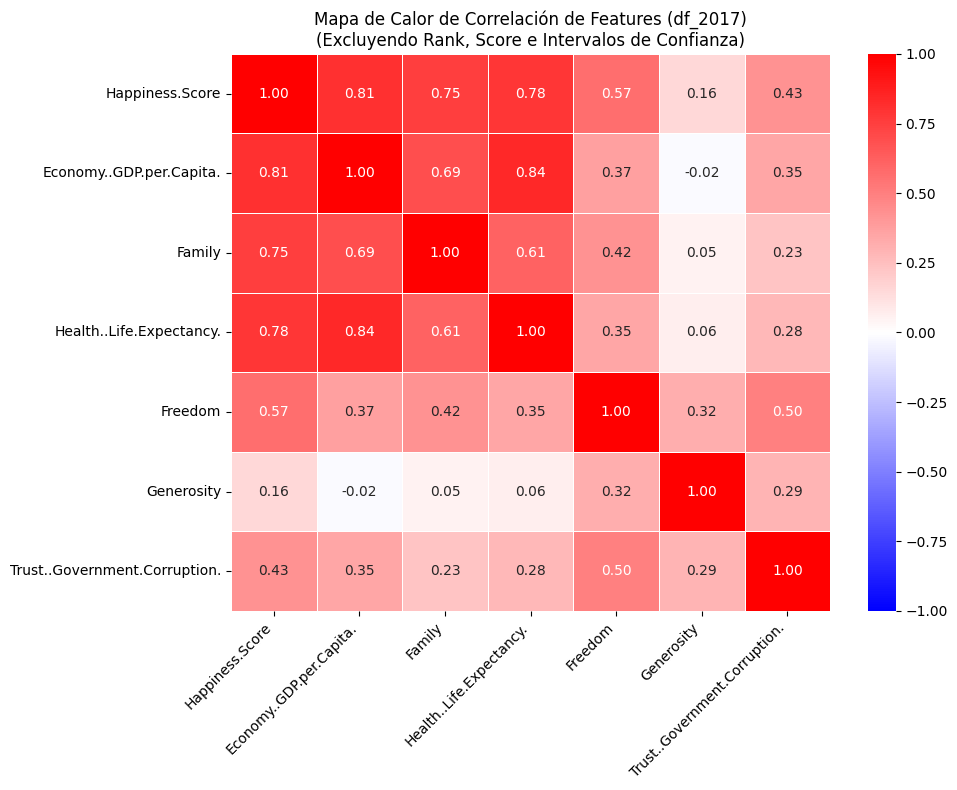

2025-05-18 21:08:43,995 - INFO - Mapa de calor de correlación de features generado y mostrado para df_2017.


In [22]:
# --- Generar y visualizar la matriz de correlación (Heatmap) para df_2017 ---
if 'df_2017' in locals() and df_2017 is not None:
    logging.info("Iniciando el cálculo de la correlación gráfica para df_2017.")

    numeric_cols = df_2017.select_dtypes(include=np.number).columns.tolist()
    logging.info(f"Columnas numéricas identificadas en df_2017: {numeric_cols}")

    # Columnas a excluir del análisis de correlación de *features*
    # Para 2017, los nombres tienen puntos.
    cols_to_exclude_from_features_heatmap = [
        'Happiness.Rank',         # Excluimos el rank
        'Whisker.high',           # Intervalo de confianza
        'Whisker.low',
        'Dystopia.Residual'             # Intervalo de confianza
    ]
    actual_cols_to_exclude = [col for col in cols_to_exclude_from_features_heatmap if col in numeric_cols]
    logging.info(f"Columnas a excluir del heatmap de correlación de features: {actual_cols_to_exclude}")

    cols_for_correlation = [col for col in numeric_cols if col not in actual_cols_to_exclude]

    if not cols_for_correlation:
        logging.warning("No quedan columnas numéricas para el análisis de correlación de features después de la exclusión en df_2017.")
        print("\nNo hay columnas numéricas suficientes para el heatmap de correlación de features en df_2017.")
    else:
        logging.info(f"Columnas seleccionadas para el heatmap de correlación de features (df_2017): {cols_for_correlation}")
        df_correlation_subset = df_2017[cols_for_correlation]
        correlation_matrix = df_correlation_subset.corr()
        logging.info("Matriz de correlación de features calculada para df_2017.")

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt=".2f", linewidths=.5, vmin=-1, vmax=1, center=0)
        plt.title('Mapa de Calor de Correlación de Features (df_2017)\n(Excluyendo Rank, Score e Intervalos de Confianza)')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        logging.info("Mapa de calor de correlación de features generado y mostrado para df_2017.")

else:
    logging.error("El DataFrame df_2017 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 21:08:44,003 - INFO - Generando matriz de histogramas/KDE para variables numéricas clave de df_2017.


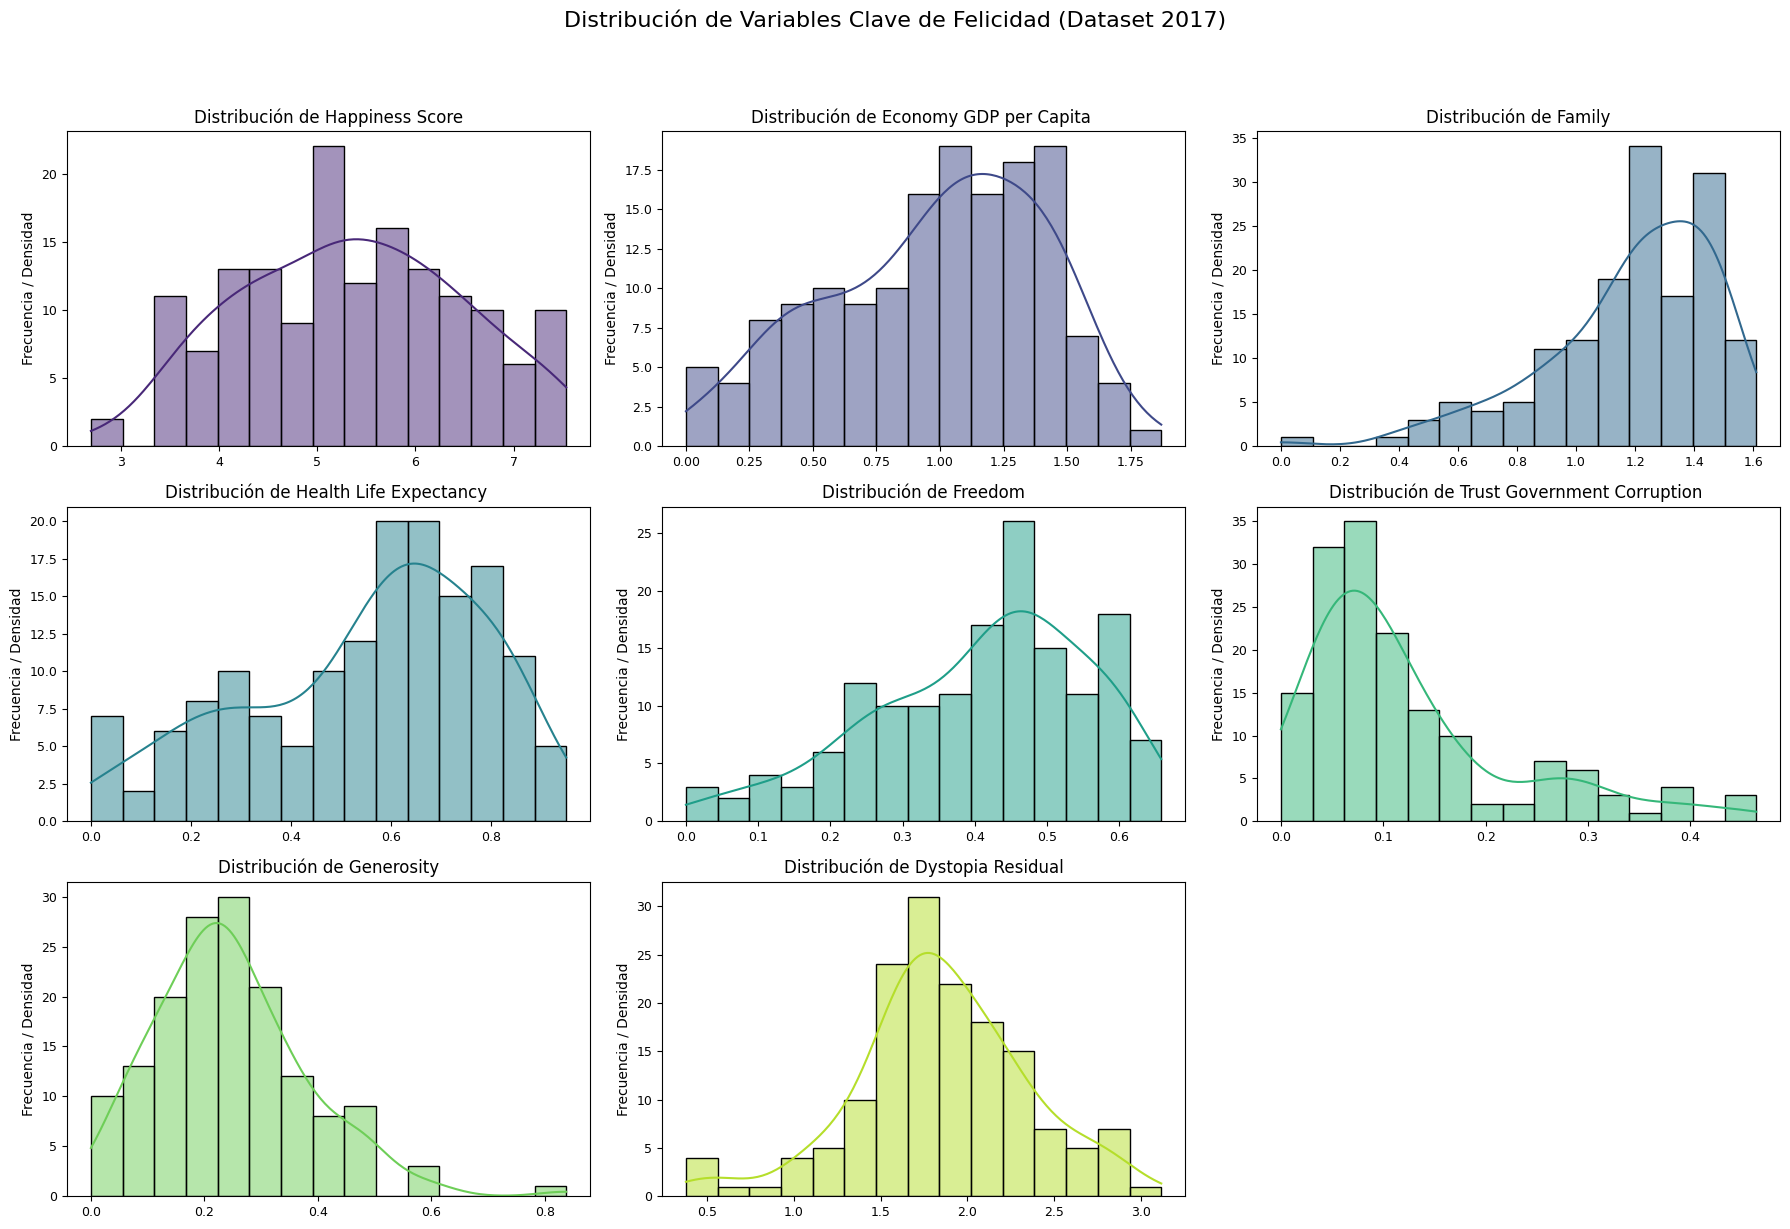

2025-05-18 21:08:45,075 - INFO - Matriz de histogramas/KDE generada y mostrada para df_2017 con paleta viridis.


In [23]:
# --- Distribuciones de Variables Numéricas (Histogramas/KDE) para df_2017 ---
if 'df_2017' in locals() and df_2017 is not None:
    logging.info("Generando matriz de histogramas/KDE para variables numéricas clave de df_2017.")

    # Columnas numéricas para el análisis de distribución (nombres actualizados para 2017)
    # Excluimos 'Happiness.Rank', 'Whisker.high', 'Whisker.low'
    cols_for_hist_2017 = [
        'Happiness.Score',
        'Economy..GDP.per.Capita.',
        'Family',
        'Health..Life.Expectancy.',
        'Freedom',
        'Trust..Government.Corruption.',
        'Generosity',
        'Dystopia.Residual'
    ]
    # Asegurarnos que las columnas existan en el DataFrame
    actual_cols_for_hist_2017 = [col for col in cols_for_hist_2017 if col in df_2017.columns]

    if not actual_cols_for_hist_2017:
        logging.warning("No hay columnas seleccionadas para generar histogramas/KDE en df_2017.")
        print("\nNo hay columnas seleccionadas para generar histogramas/KDE en df_2017.")
    else:
        n_cols_plot = 3
        n_rows_plot = (len(actual_cols_for_hist_2017) + n_cols_plot - 1) // n_cols_plot

        plt.figure(figsize=(18, n_rows_plot * 4))
        plt.suptitle('Distribución de Variables Clave de Felicidad (Dataset 2017)', fontsize=16, y=1.02)

        # Obtener una lista de colores de la paleta viridis
        # Usaremos tantos colores como gráficos tengamos para evitar repetición si es posible,
        # o haremos un ciclo si hay más gráficos que colores únicos en una paleta típica.
        palette_colors = sns.color_palette("viridis", n_colors=len(actual_cols_for_hist_2017))

        for i, col in enumerate(actual_cols_for_hist_2017):
            plt.subplot(n_rows_plot, n_cols_plot, i + 1)
            sns.histplot(df_2017[col],
                         kde=True,
                         bins=15,
                         color=palette_colors[i]) # Usar el color correspondiente de la paleta
            # Limpiar un poco los nombres de columna para los títulos
            clean_col_name = col.replace('..', ' ').replace('.', ' ')
            plt.title(f'Distribución de {clean_col_name}', fontsize=12)
            plt.xlabel('')
            plt.ylabel('Frecuencia / Densidad', fontsize=10)
            plt.xticks(fontsize=9)
            plt.yticks(fontsize=9)

        for j in range(len(actual_cols_for_hist_2017), n_rows_plot * n_cols_plot):
            plt.subplot(n_rows_plot, n_cols_plot, j + 1).set_visible(False)

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()
        logging.info("Matriz de histogramas/KDE generada y mostrada para df_2017 con paleta viridis.")
else:
    logging.error("El DataFrame df_2017 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 21:08:45,085 - INFO - Generando boxplots horizontales para identificar outliers generales en variables numéricas de df_2017.


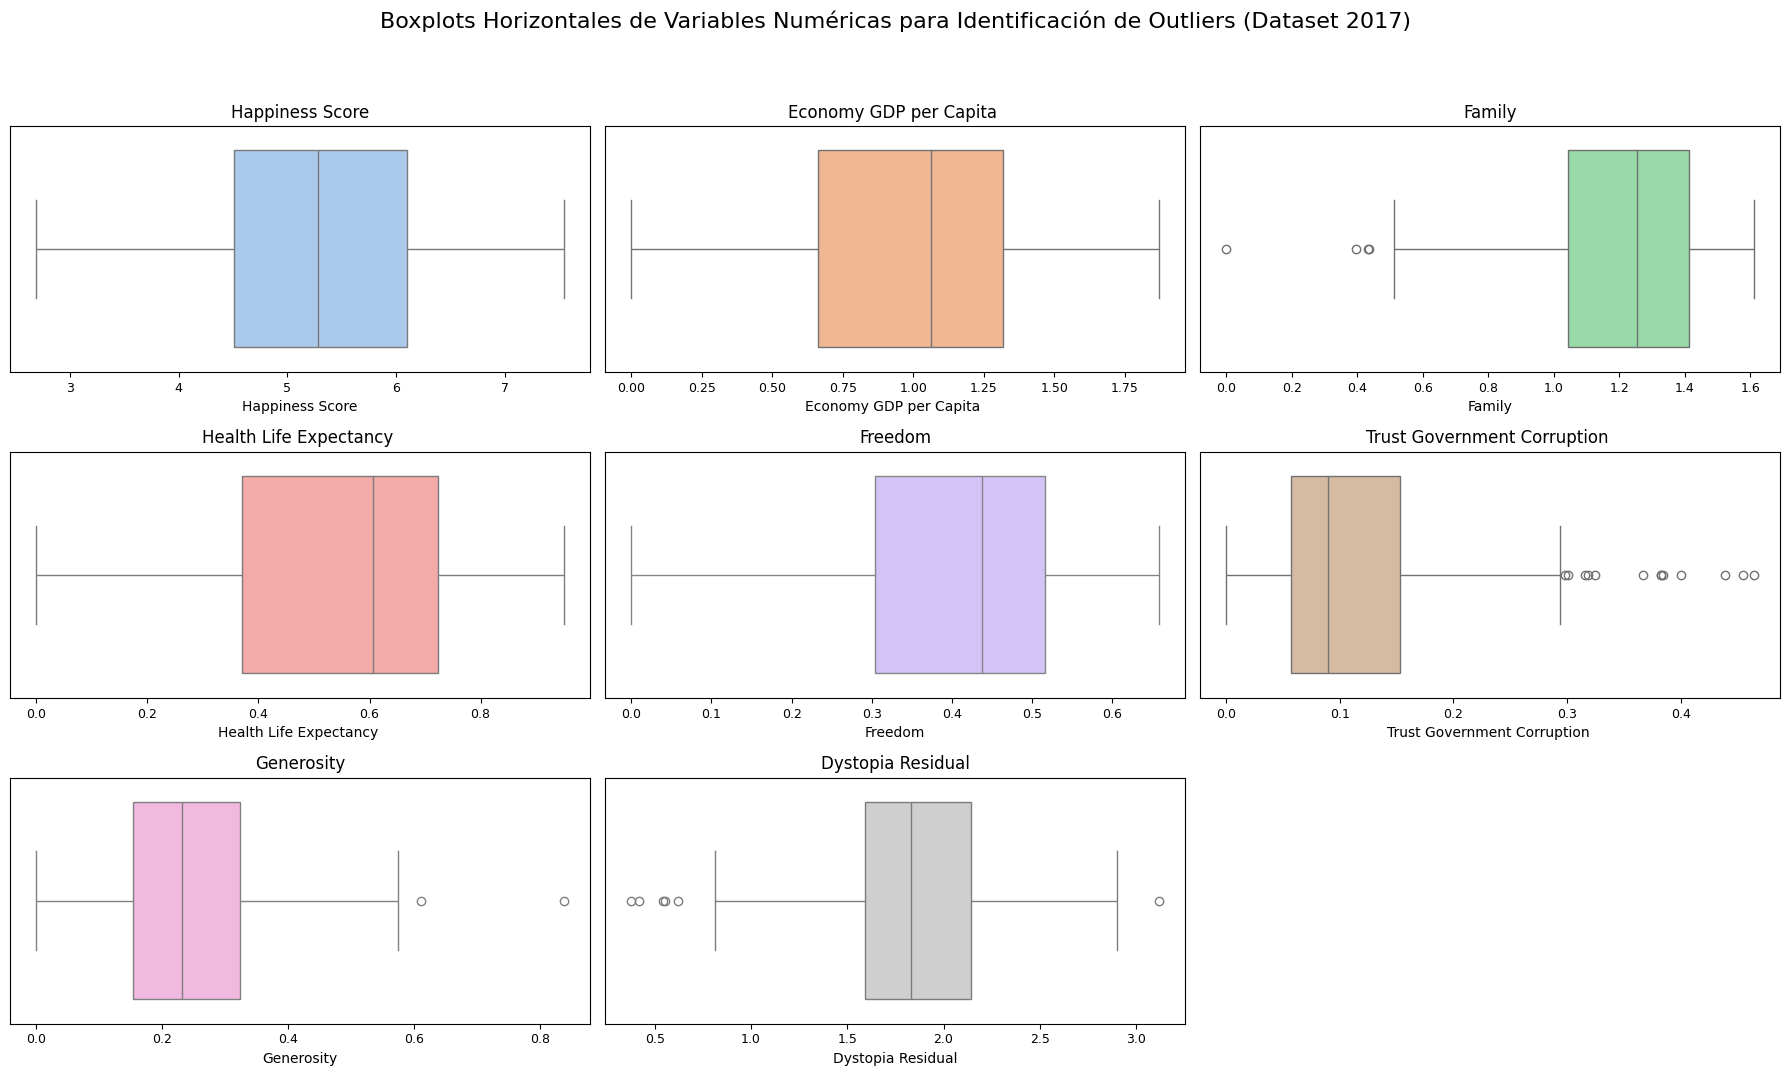

2025-05-18 21:08:45,616 - INFO - Boxplots horizontales generales generados y mostrados para df_2017.


In [24]:
# --- Boxplots Horizontales para Identificación de Outliers Generales (df_2017) ---
if 'df_2017' in locals() and df_2017 is not None:
    logging.info("Generando boxplots horizontales para identificar outliers generales en variables numéricas de df_2017.")

    actual_cols_for_hist_2017 = [col for col in cols_for_hist_2017 if col in df_2017.columns]

    if not actual_cols_for_hist_2017:
        logging.warning("No hay columnas seleccionadas para generar boxplots generales en df_2017.")
        print("\nNo hay columnas seleccionadas para generar boxplots generales en df_2017.")
    else:
        n_cols_plot = 3
        n_rows_plot = (len(actual_cols_for_hist_2017) + n_cols_plot - 1) // n_cols_plot

        plt.figure(figsize=(18, n_rows_plot * 3.5))
        plt.suptitle('Boxplots Horizontales de Variables Numéricas para Identificación de Outliers (Dataset 2017)', fontsize=16, y=1.02)

        for i, col in enumerate(actual_cols_for_hist_2017):
            plt.subplot(n_rows_plot, n_cols_plot, i + 1)
            sns.boxplot(x=df_2017[col], color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], orient='h')
            clean_col_name = col.replace('..', ' ').replace('.', ' ')
            plt.title(clean_col_name, fontsize=12)
            plt.xlabel(clean_col_name, fontsize=10)
            plt.ylabel('')
            plt.xticks(fontsize=9)
            plt.yticks([])

        for j in range(len(actual_cols_for_hist_2017), n_rows_plot * n_cols_plot):
            plt.subplot(n_rows_plot, n_cols_plot, j + 1).set_visible(False)

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()
        logging.info("Boxplots horizontales generales generados y mostrados para df_2017.")
else:
    logging.error("El DataFrame df_2017 no está cargado. Por favor, ejecuta la celda de carga primero.")